<a href="https://colab.research.google.com/github/danacioDS/AI-ML-SimpliLearn/blob/master/02_KNN_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
!pip install PyDrive

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile( {'id':"1TB5pQRfPPlvHJgfnnGxEI2HtrCp1BX38"} )   # replace the id with id of file you want to access
downloaded.GetContentFile('diabetes.csv')

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('diabetes.csv')

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
data['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [22]:
high_glocose = data[data['Glucose']>=120]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d9a637550>,
      dtype=object)

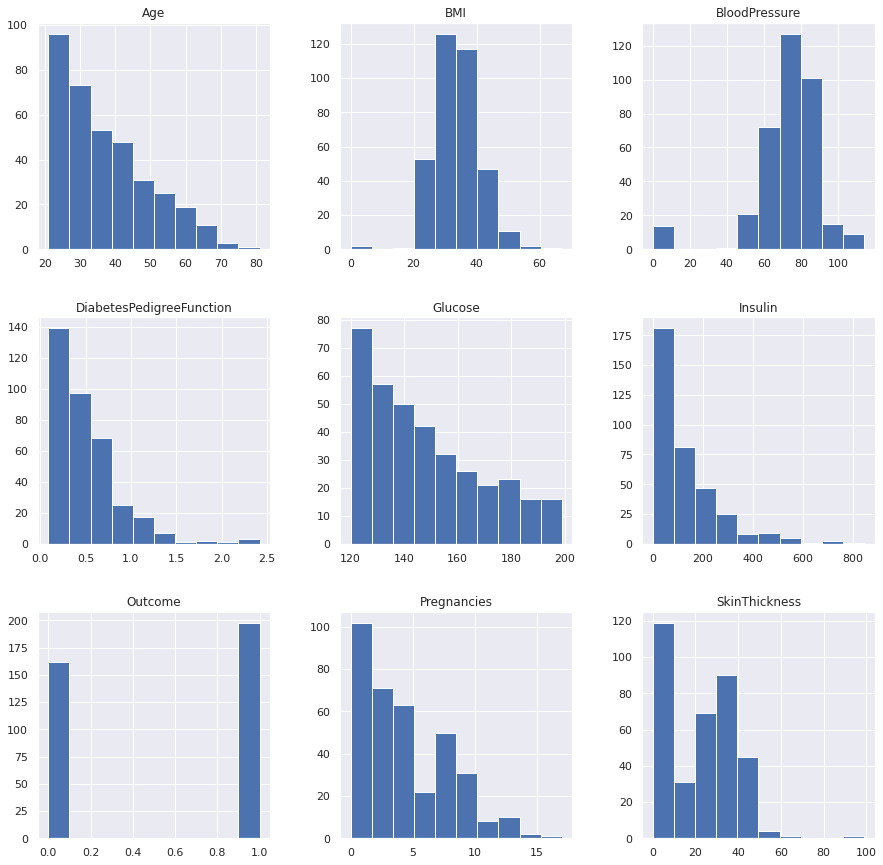

In [23]:
high_glocose.hist(figsize=(15,15))

In [ ]:
data_copy = data.copy(deep = True)

In [ ]:
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose',
                                                                                    'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


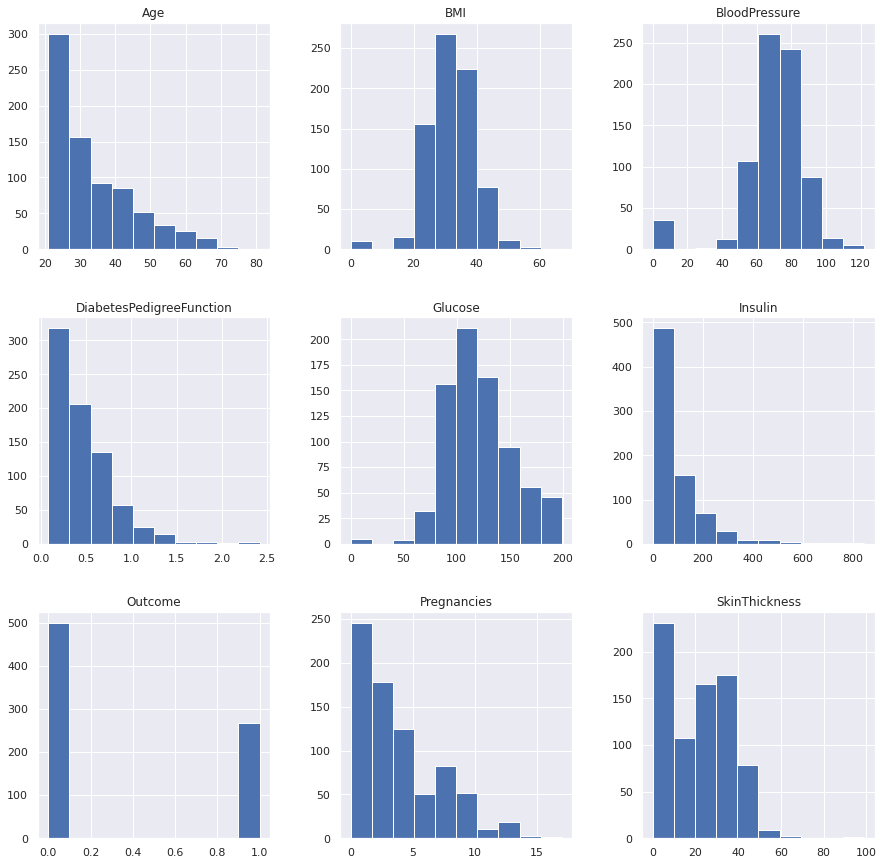

In [ ]:
p = data.hist(figsize=(15, 15))

In [ ]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].mean(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].mean(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(), inplace = True)

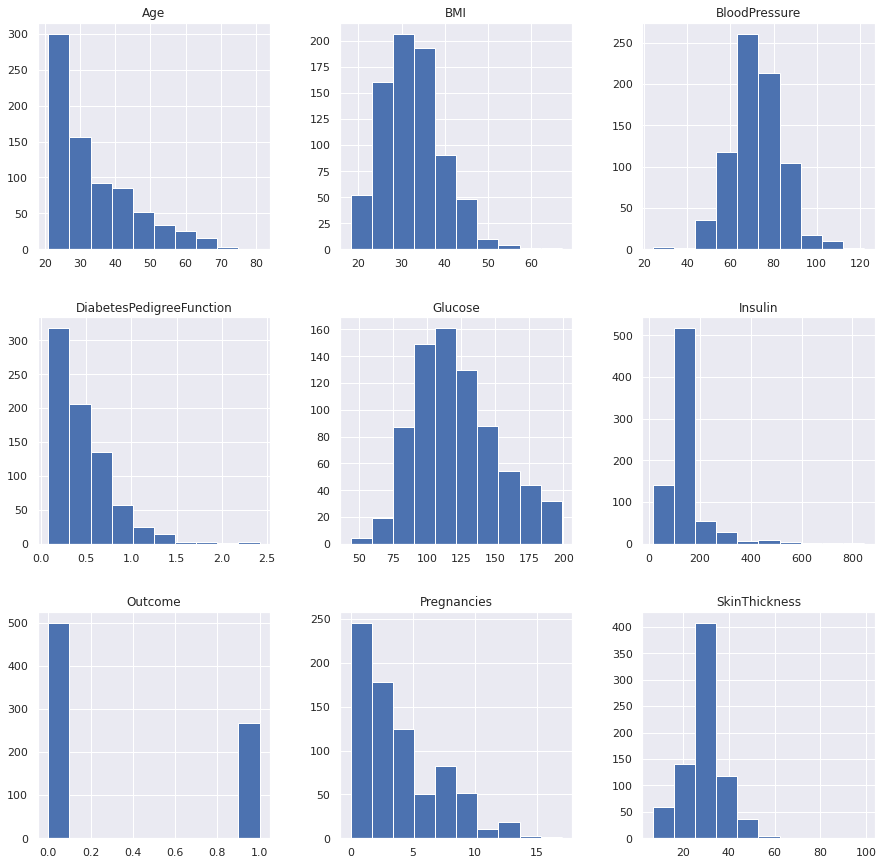

In [ ]:
p = data_copy.hist(figsize = (15,15))

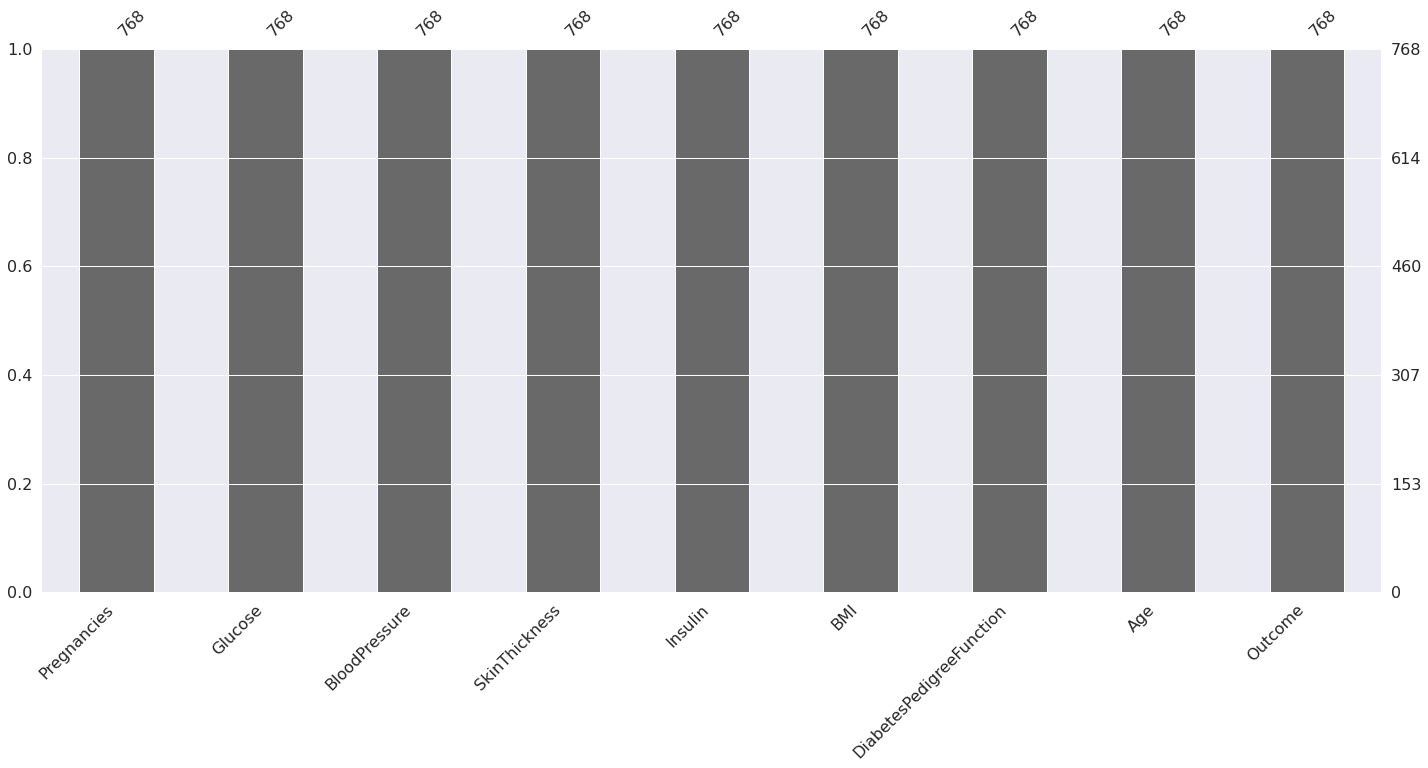

In [ ]:
## null count analysis
import missingno as msno
p=msno.bar(data)

0    500
1    268
Name: Outcome, dtype: int64


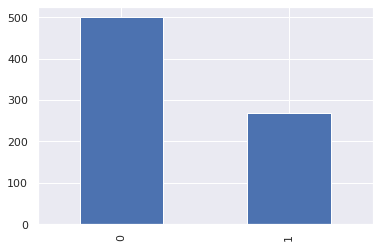

In [ ]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

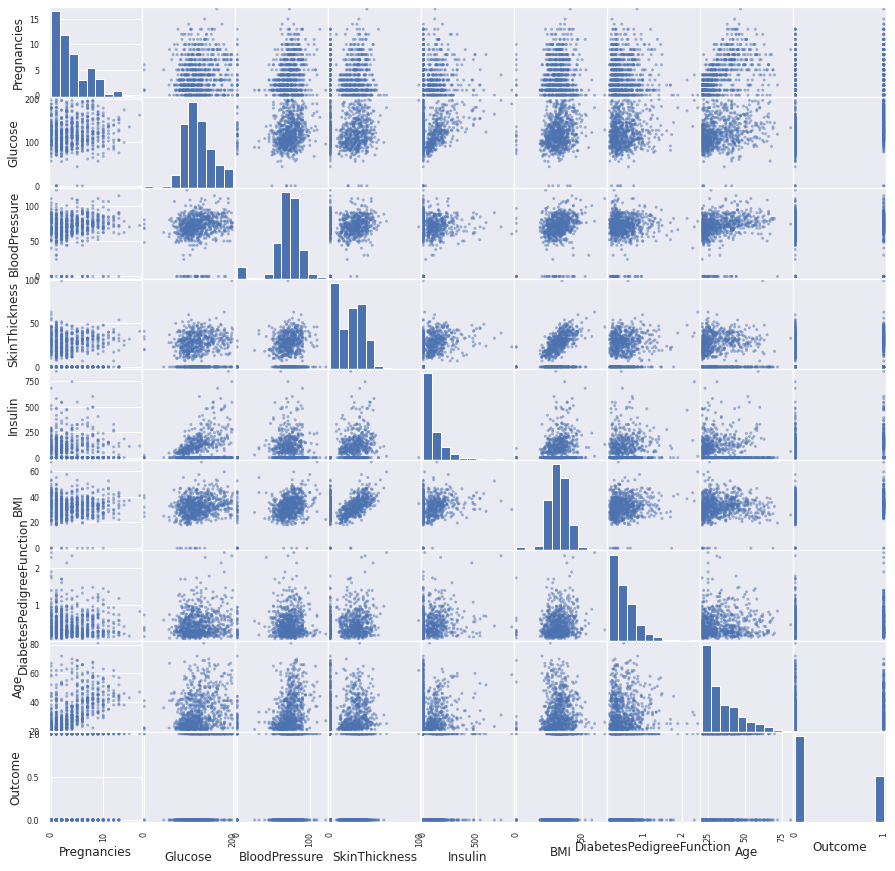

In [ ]:
from pandas.plotting import scatter_matrix

p=scatter_matrix(data,figsize=(15, 15))

<Figure size 720x720 with 0 Axes>

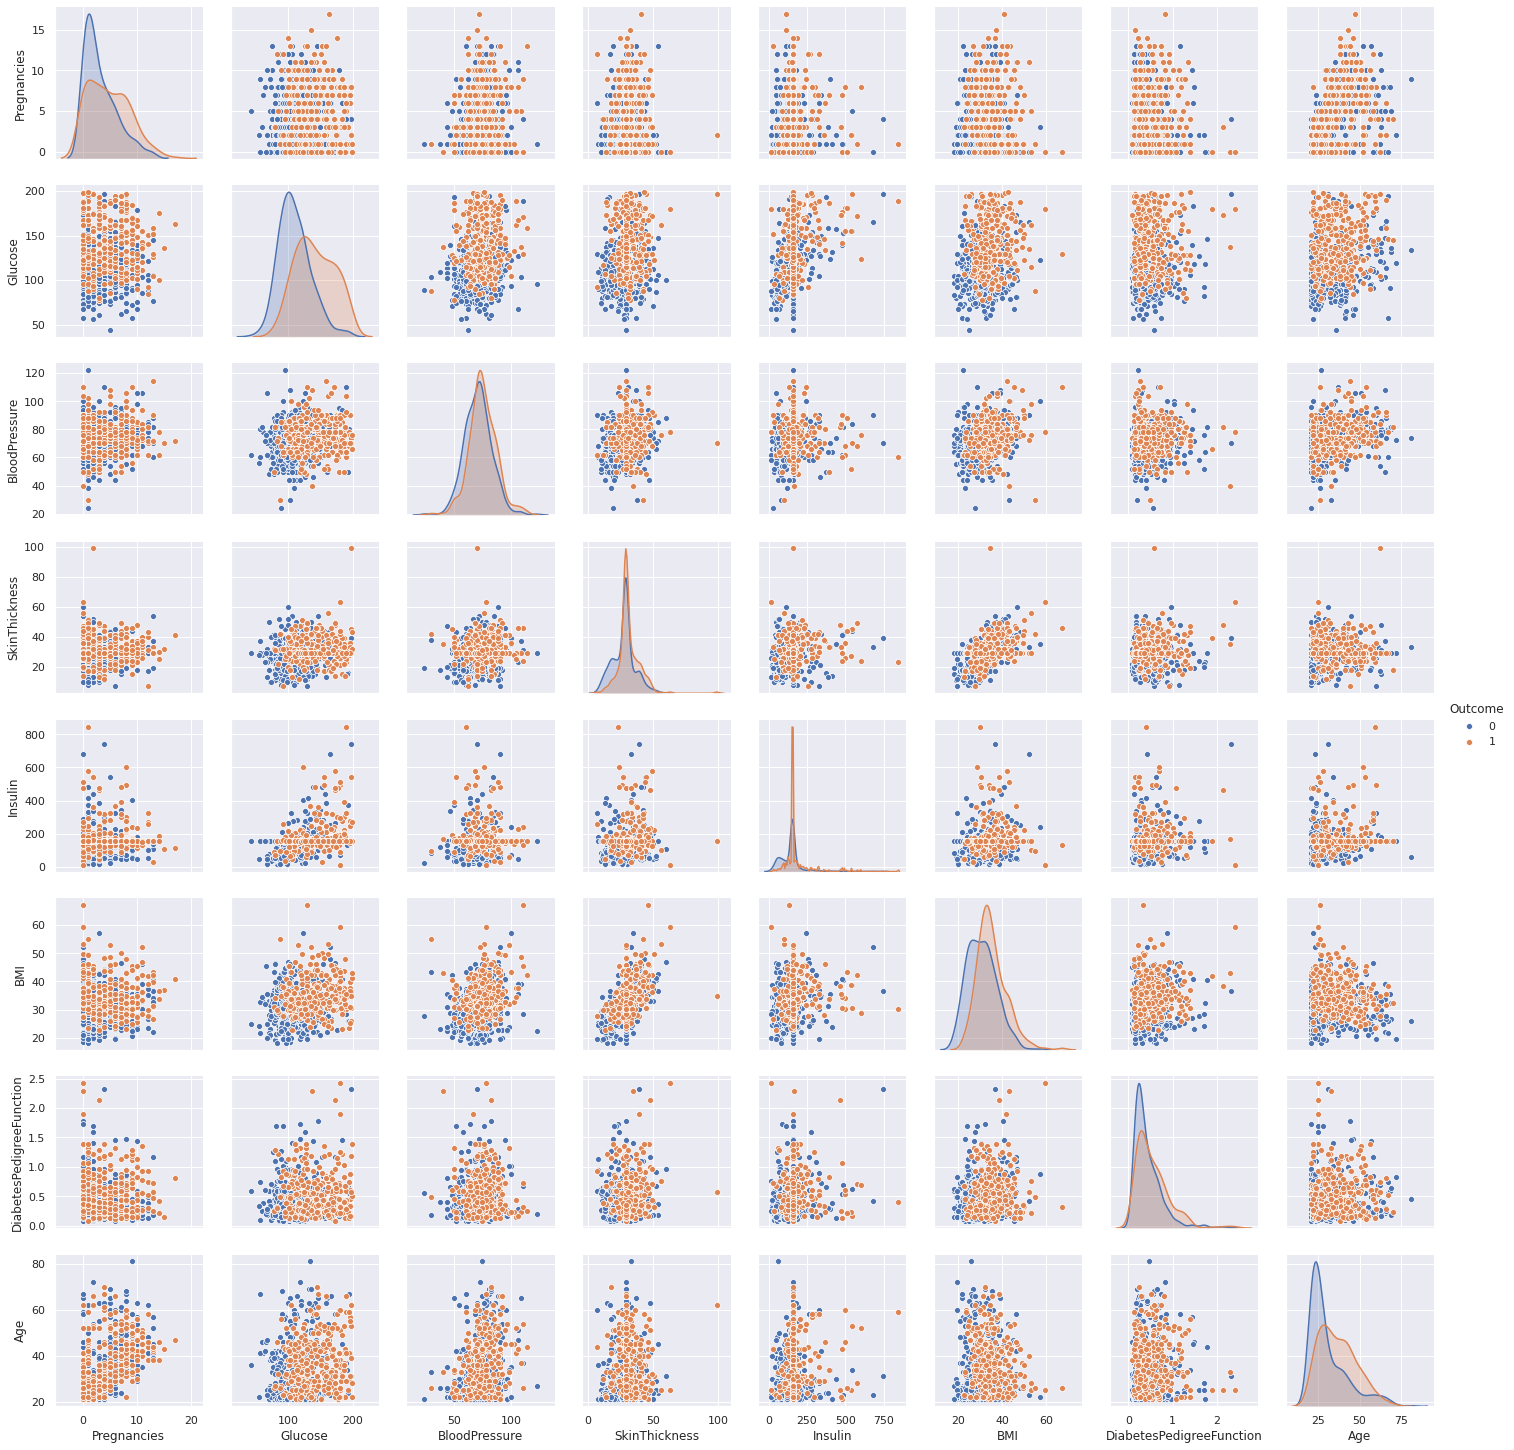

In [ ]:
plt.figure(figsize=(10,10))
p=sns.pairplot(data_copy, hue = 'Outcome')

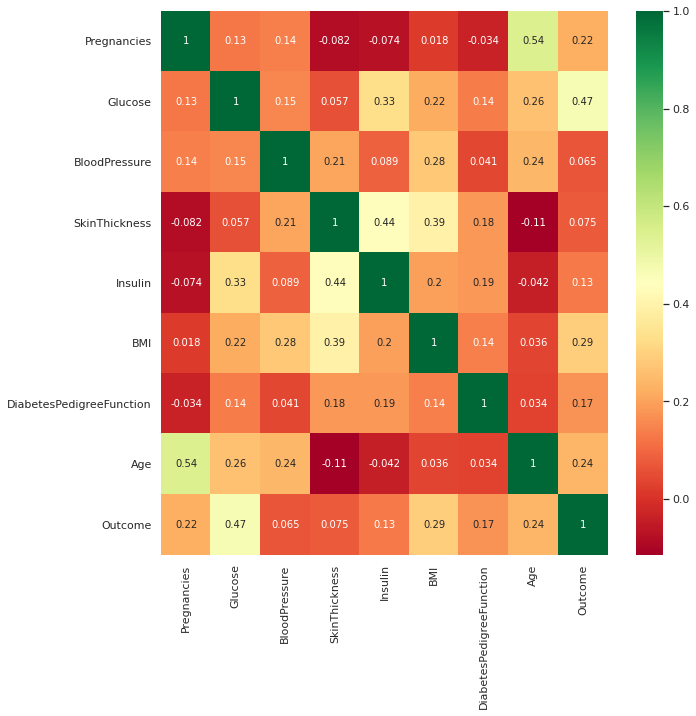

In [ ]:
plt.figure(figsize=(10,10))
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [ ]:
y = data_copy.Outcome

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max test score 76.171875 % and k = [11]


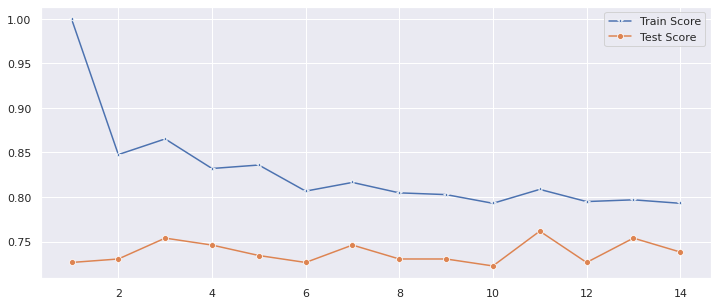

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

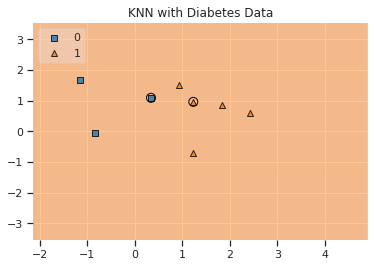

In [ ]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,24,167
1,37,52,89
All,180,76,256


Text(0.5, 12.5, 'Predicted label')

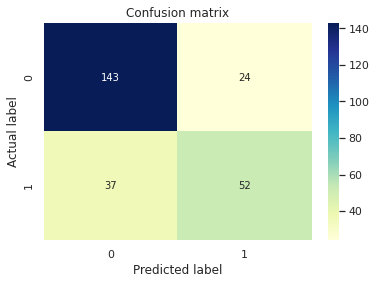

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.58      0.63        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.73       256
weighted avg       0.76      0.76      0.76       256



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

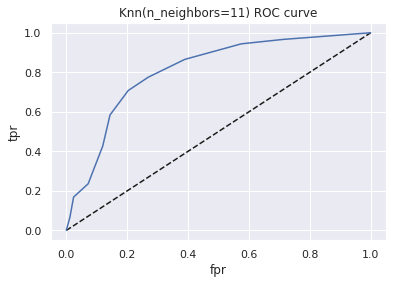

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8072730942609163

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7748068924539513
Best Parameters: {'n_neighbors': 25}
